In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
datapath = "../../data/statefarm/sample/"

In [5]:
sz = 224

In [50]:
arch=resnet34
data = ImageClassifierData.from_paths(datapath, tfms=tfms_from_model(arch, sz))

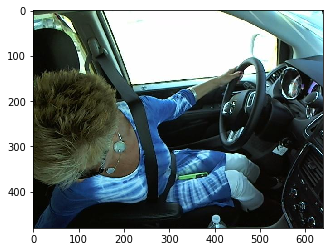

In [72]:
img = plt.imread(datapath + data.trn_ds.fnames[750])
plt.imshow(img)

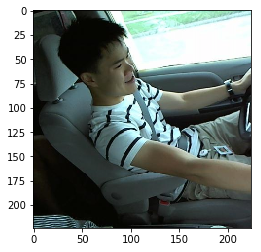

In [18]:
img_n = data.trn_ds.denorm(data.trn_ds[500][0])[0]
plt.imshow(img_n)

In [65]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [51]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [52]:
learn.fit(0.01, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[ 0.       2.35714  1.96138  0.34102]                    
[ 1.       1.71986  1.57619  0.48125]                    
[ 2.       1.34673  1.52582  0.47246]                    
[ 3.       1.07901  1.55985  0.47637]                    
[ 4.       0.87212  1.62897  0.4791 ]                     
[ 5.       0.72484  1.64081  0.47031]                     
[ 6.       0.62959  1.64317  0.48008]                     
[ 7.       0.55073  1.65223  0.47617]                     
[ 8.       0.49186  1.65167  0.48008]                     
[ 9.       0.44145  1.72277  0.47949]                     



In [55]:
preds = learn.predict()
predcat = np.argmax(preds, axis = 1)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data.trn_ds.y, predcat)

[[43  5  0 10  7  3  1  7  2 22]
 [ 0 47  2  3  0  3  4 19 10 12]
 [ 4  2 36  2  0  0 17  4 25 10]
 [ 2  2  0 86  6  0  0  0  3  1]
 [ 3  1  0 18 56  2  1  4  8  7]
 [10  7  2  7  3 18  0 21  6 26]
 [ 0 23  7  2  2  2 37  3 18  6]
 [ 0  3  0  3  0  1  0 81  6  6]
 [ 3  6  7  1  0  1  2 22 53  5]
 [16  3  0  9  2  3  1 33  4 29]]


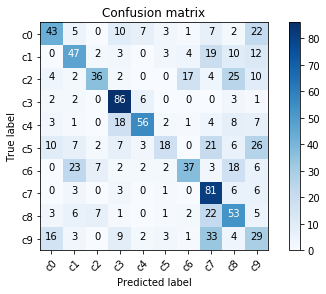

In [69]:
plot_confusion_matrix(cm, data.classes)

In [31]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [32]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[  0.        2.81934  78.29954   0.2418 ]                



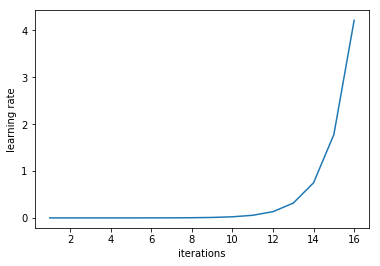

In [33]:
learn.sched.plot_lr()

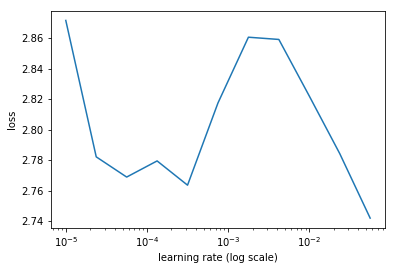

In [37]:
learn.sched.plot(n_skip=0)

In [41]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [42]:
data = ImageClassifierData.from_paths(datapath, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [48]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[      0.        11160.54731  541259.            0.40039]    
[       1.         10114.69115  1433709.5            0.41367]
[       2.         10164.04482  2973561.             0.41953]
[       3.          9878.06226  8196810.             0.43438]
[      4.         9314.68806  628992.            0.42949]    

